In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['master.csv']


In [2]:
data = pd.read_csv("../input/master.csv")
data.head(25)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [3]:
data.drop(columns = ["country-year"],inplace= True)
data.drop(columns = ["HDI for year"],inplace= True)



Lets find the total suicide number by each country

In [18]:

country_list = []
for country in data.country.unique():
    country_list.append(country)

new_count=[]
summ =0
count = 0
index = 0
suicide_num_list = []
year_count = 0

while index < len(data.country):
    if  data.country[index] == country_list[count]:
        summ = summ + data.suicides_no[index]
        index += 1
            
    else:
        suicide_num_list.append(summ)
        summ =0
        count += 1
suicide_num_list.append(summ)

suicide_num_list



[1970,
 11,
 82219,
 1905,
 101,
 70111,
 50073,
 1656,
 93,
 463,
 177,
 59892,
 62761,
 348,
 318,
 226613,
 36388,
 42,
 107561,
 40895,
 53080,
 6792,
 18429,
 41418,
 412,
 43687,
 15297,
 0,
 20660,
 11683,
 7034,
 304,
 33677,
 329127,
 3224,
 291262,
 12368,
 38,
 8149,
 3426,
 73891,
 1108,
 12574,
 11294,
 132060,
 184,
 806902,
 101546,
 53,
 966,
 13090,
 12770,
 28039,
 1958,
 27,
 20,
 585,
 3894,
 111139,
 423,
 472,
 50833,
 14383,
 2013,
 16992,
 33,
 3483,
 4783,
 21330,
 139098,
 24061,
 9043,
 574,
 261730,
 72777,
 1209742,
 0,
 230,
 124,
 4,
 24179,
 98,
 10089,
 13437,
 10615,
 7321,
 100202,
 55641,
 2166,
 37795,
 26217,
 110643,
 4039,
 10131,
 8624,
 319950,
 622,
 136805,
 1034013,
 13138,
 34803]

In [5]:


iplot([go.Choropleth(
    locationmode='country names',
    locations=country_list,
    text=country_list,
    z=suicide_num_list
)])



We can also find suicide number according to year_list

In [6]:
year_list = []
for year in data.year.unique():
    year_list.append(year)

year_list = sorted(year_list) 


kill_by_year = []
for each in year_list:
    new_data = data[data.year == each]
    kill_by_year.append(sum(new_data.suicides_no))

kill_by_year   
    
        

[116063,
 120670,
 126842,
 121026,
 160244,
 193361,
 198020,
 211473,
 221565,
 232063,
 243544,
 246725,
 240745,
 249591,
 256119,
 255832,
 250652,
 256095,
 256079,
 240861,
 234375,
 233361,
 233408,
 235447,
 243487,
 238702,
 236484,
 230160,
 223199,
 222984,
 203640,
 15603]

Text(0.5, 1.0, 'year vs sucicide graph')

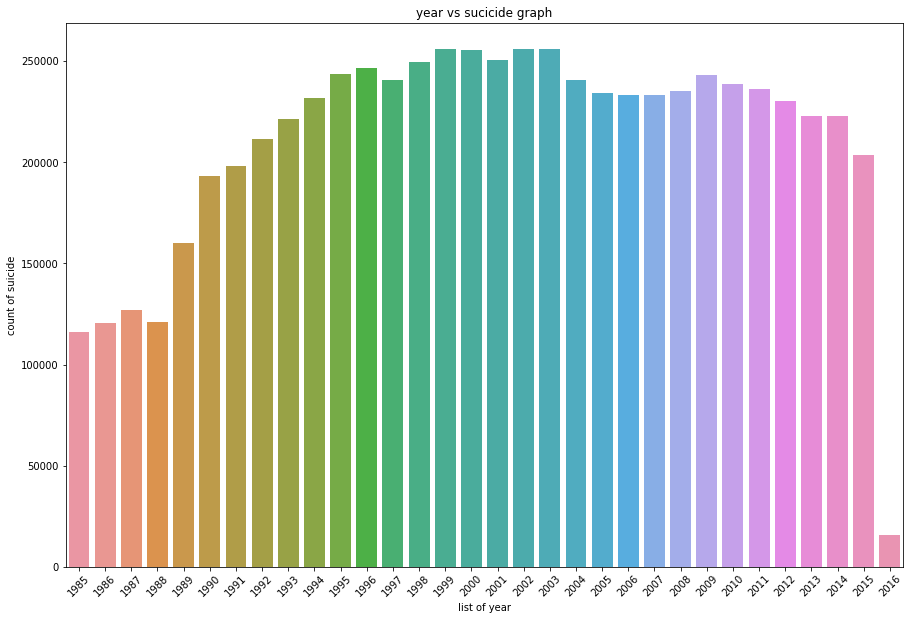

In [7]:
plt.figure(figsize = (15,10))
sns.barplot(x = year_list, y =kill_by_year,)
plt.xticks(rotation = 45)
plt.xlabel("list of year")
plt.ylabel("count of suicide")
plt.title("year vs sucicide graph")

In [8]:
data.iloc[:,7] = [each.replace(",","") for each in data.iloc[:,7]]
data.iloc[:,7]= data.iloc[:,7].astype(float)
data.info()

    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
 gdp_for_year ($)     27820 non-null float64
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 2.1+ MB


We can create a list which contains total suicide number by country and year.

In [9]:
liste =[]
sum_list=[]


      
index =0
temp = 0
year_List = []
country_List = []
for country in country_list:
    new_data = data[data.country == country]
    for year in year_list:
        year_data = new_data[new_data.year == year]
        if len(year_data.year) != 0:
            for i in range(len(year_data.year)):
                liste.append(data.population[index])
                index += 1
            sum_list.append(sum(liste[temp:index]))
            year_List.append(year)
            country_List.append(country)
            
            
            temp = index
        else:
            pass


sum_list

[2709600,
 2764300,
 2803100,
 2822500,
 2807300,
 2849300,
 2903400,
 2940200,
 2977300,
 3012700,
 3029700,
 2796300,
 2799349,
 2818839,
 2843929,
 2874991,
 2783320,
 2780176,
 2770344,
 2757059,
 2745735,
 2736025,
 62574,
 61270,
 60261,
 59564,
 59238,
 59334,
 60394,
 61741,
 63315,
 65044,
 66846,
 72225,
 73832,
 75326,
 76497,
 77588,
 78658,
 79722,
 80809,
 81973,
 83131,
 84273,
 85405,
 88703,
 89779,
 90837,
 91889,
 27090800,
 27244400,
 27599400,
 28308000,
 28702000,
 29091100,
 29623000,
 30045400,
 30477500,
 30911200,
 31345400,
 31780700,
 32333781,
 32757259,
 33174862,
 33585533,
 34010946,
 34407507,
 34785907,
 35162945,
 35550617,
 35918886,
 36315492,
 36733520,
 37158001,
 37578454,
 38015739,
 38441778,
 38859125,
 39276555,
 39699624,
 2983700,
 3230800,
 3308700,
 3366600,
 3402500,
 3443200,
 3486300,
 3526700,
 3558000,
 3580700,
 3606500,
 3610516,
 3014844,
 3024366,
 2764396,
 2735313,
 3045391,
 2689695,
 2676225,
 2670366,
 2814300,
 2810664,
 28

In [10]:

year_Data = pd.DataFrame(year_List)
country_Data = pd.DataFrame(country_List)
num_of_pop_Data = pd.DataFrame(sum_list)

pop_Data = pd.concat([country_Data,num_of_pop_Data,year_Data],axis =1)
names = ["Country", "Total_Population", "Year"]
pop_Data.columns=names

pop_Data




,Country,Total_Population,Year
0,Albania,2709600,1987
1,Albania,2764300,1988
2,Albania,2803100,1989
3,Albania,2822500,1992
4,Albania,2807300,1993
5,Albania,2849300,1994
6,Albania,2903400,1995
7,Albania,2940200,1996
8,Albania,2977300,1997
9,Albania,3012700,1998


In this part we will directly focus on the USA data.

Text(0.5, 1.0, 'Population of USA between 1985 to 2015')

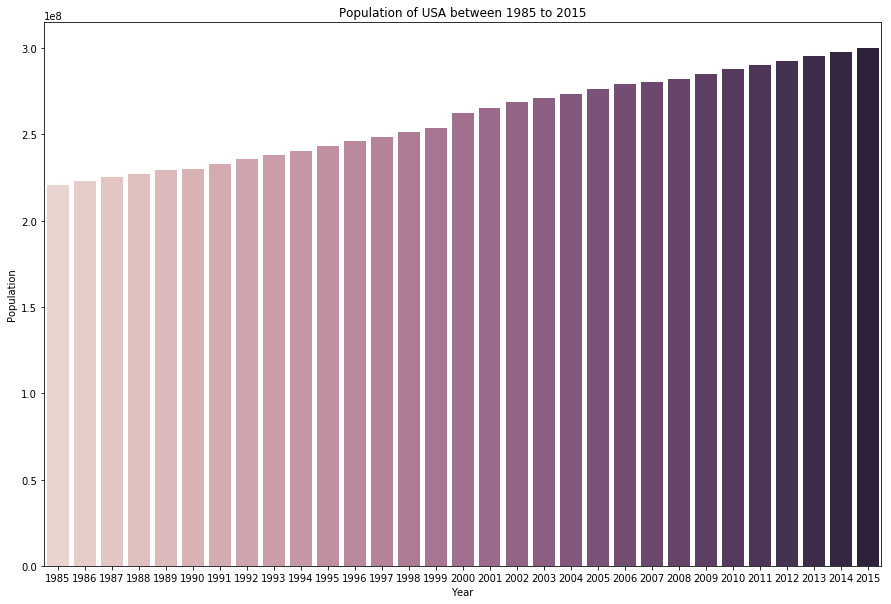

In [11]:
USA_data = pop_Data[pop_Data.Country == "United States"]


plt.figure(figsize=(15,10))
ax= sns.barplot(x=USA_data.Year, y=USA_data.Total_Population,
                palette = sns.cubehelix_palette(len(USA_data.Year)))
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population of USA between 1985 to 2015")

Total population in 2000

In [12]:
import plotly.graph_objs as go

year_pop_data = pop_Data[pop_Data.Year == 2000]
trace =go.Scatter(
                    x = year_pop_data.Country,
                    y = year_pop_data.Total_Population,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= year_pop_data.Country)

data = [trace]

layout = dict(title = "Total population in 2000.",
              xaxis= dict(title= 'Country name',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Population',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

World population graph according to year_list

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

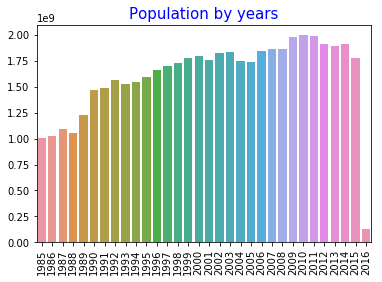

In [13]:
sum_pop_list = []
for year in year_list:  
    new_Data = pop_Data[pop_Data.Year == year]
    sum_pop_list.append(sum(new_Data.Total_Population))



sns.barplot(x=year_list,y = sum_pop_list)
plt.title('Population by years',color = 'blue',fontsize=15)
plt.xticks(rotation = 90)
    


In [14]:
data = pd.read_csv("../input/master.csv")
data.drop(columns = ["country-year"],inplace= True)
data.drop(columns = ["HDI for year"],inplace= True)


data.head(25)

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,"2,156,624,900",796,Generation X


Number of male suicide 13910
Number of female suicide 13910


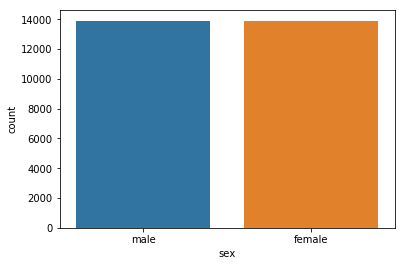

In [15]:
y = data.sex
ax = sns.countplot(y, label = "Count")

male, female = y.value_counts()
print("Number of male suicide {}".format(male))
print("Number of female suicide {}".format(female))

Lets predict male or female by using linear regression

In [16]:

y = data.sex

x = data.drop(["country","age", "generation","sex",], axis =1)
x = x[["year","suicides_no","population","suicides/100k pop", "gdp_per_capita ($)"]]
x_norm = (x - x.min())/(x.max()-x.min())

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)


from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))


x train:  (5, 23647)
x test:  (5, 4173)
y train:  (23647,)
y test:  (4173,)


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



test accuracy: 0.7088425593098491 


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



train accuracy: 0.7131137142132195 
